In [1]:
#Importing some required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import RandomizedSearchCV

In [2]:
#let load our dataset
df = pd.read_csv('car_data.csv')

In [3]:
#here I have manfacturer,model,vechile_type,latest_launch has object datatype and remain attributes has float or int data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [4]:
df.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.00000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591,19.184713,6.012739,232.073248,3215.191083,14.757962,72.146497,1.43949
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664,5.909382,1.815133,120.030803,967.364627,2.924589,1.462415,0.71913
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.00000
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707,14.000000,4.000000,113.000000,2300.000000,13.000000,71.000000,1.00000
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917,18.000000,6.000000,232.000000,3121.000000,14.500000,72.000000,1.00000
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878,24.000000,8.000000,350.000000,4129.000000,16.500000,73.000000,2.00000
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323,35.000000,8.000000,455.000000,5140.000000,23.500000,75.000000,3.00000


Dealing with missing values

In [5]:
#Now,we shall drop the attributes which are not necessary to our prediction
df = df.drop(["Manufacturer","Model","Sales_in_thousands","__year_resale_value","Vehicle_type","Fuel_efficiency","Latest_Launch","Power_perf_factor","mpg","cylinders","displacement","acceleration","weight","model year","origin"],axis=1)

In [6]:
df.isna().sum()

Price_in_thousands    2
Engine_size           1
Horsepower            1
Wheelbase             1
Width                 1
Length                1
Curb_weight           2
Fuel_capacity         1
dtype: int64

all the attributes has null values.Therefore,we can fill them with mean

In [7]:
df["Price_in_thousands"].fillna(value=df["Price_in_thousands"].mean(),inplace=True)
df["Engine_size"].fillna(value=df["Engine_size"].mean(),inplace=True)
df["Horsepower"].fillna(value=df["Horsepower"].mean(),inplace=True)
df["Wheelbase"].fillna(value=df["Wheelbase"].mean(),inplace=True)
df["Width"].fillna(value=df["Width"].mean(),inplace=True)
df["Length"].fillna(value=df["Length"].mean(),inplace=True)
df["Fuel_capacity"].fillna(value=df["Fuel_capacity"].mean(),inplace=True)
df["Curb_weight"].fillna(value=df["Curb_weight"].mean(),inplace=True)

In [8]:
df.isna().sum()
#now the attributes does not have  any attribute value

Price_in_thousands    0
Engine_size           0
Horsepower            0
Wheelbase             0
Width                 0
Length                0
Curb_weight           0
Fuel_capacity         0
dtype: int64

Let's see the relationship among the attributes

My goal is to predict the curb weight of car.Therefore we check the correlation with respect to the target variable

In [9]:
df.corr()['Curb_weight']

Price_in_thousands    0.523753
Engine_size           0.754668
Horsepower            0.605226
Wheelbase             0.650211
Width                 0.718010
Length                0.625055
Curb_weight           1.000000
Fuel_capacity         0.863912
Name: Curb_weight, dtype: float64

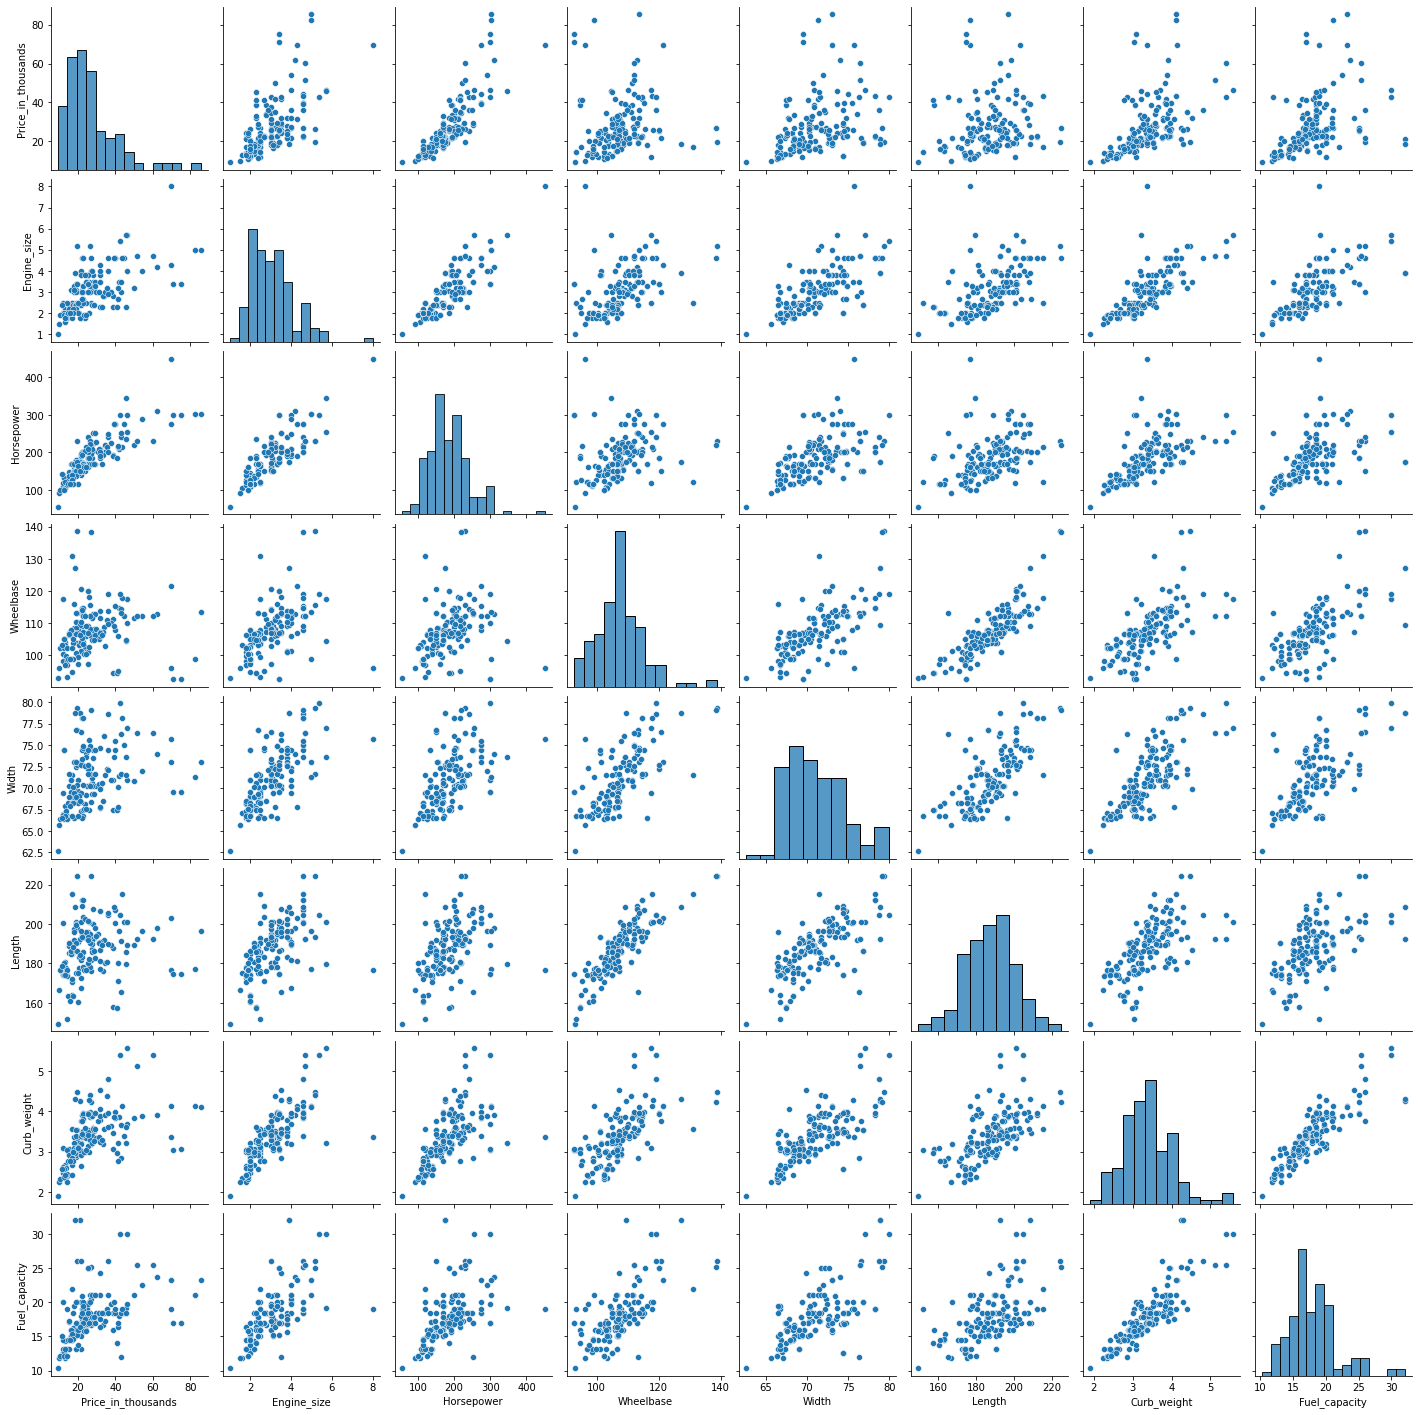

In [24]:
sns.pairplot(df)

<AxesSubplot:>

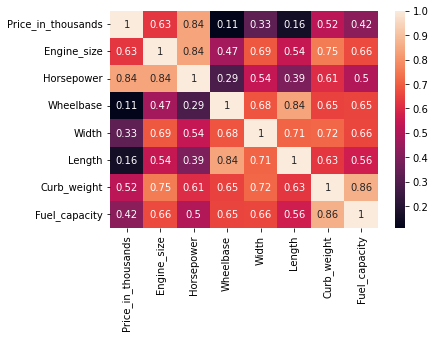

In [10]:
#To get better understanding we shall make a correlation matrix
sns.heatmap(df.corr(),annot=True)

Split the data into train and test

In [11]:
# our goal is to predict the curb weight of car.Therefore we shall spilt the data according to that
x=df.drop("Curb_weight",axis=1)
y=df["Curb_weight"]

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
x_test

,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Fuel_capacity
7,26.990000,2.500000,170.000000,107.300000,68.40,176.00000,16.600000
44,26.310000,5.200000,230.000000,115.700000,71.70,193.50000,25.000000
112,31.598000,4.300000,190.000000,107.000000,67.80,181.20000,17.500000
119,19.720000,3.400000,175.000000,107.000000,70.40,186.30000,15.200000
63,11.799000,2.000000,140.000000,100.400000,66.90,174.00000,14.500000
113,25.345000,3.400000,185.000000,120.000000,72.20,201.40000,25.000000
120,25.310000,3.800000,200.000000,101.100000,74.50,193.40000,16.800000
71,37.805000,3.000000,225.000000,110.200000,70.90,189.20000,19.800000
108,18.145000,3.100000,150.000000,107.000000,69.40,192.00000,15.200000
95,82.600000,5.000000,302.000000,99.000000,71.30,177.10000,21.100000


Standardization

In [14]:
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)

Model building based on these algorithms
- Linear Regression
- Decision tree Regressor
- Random Forest Regressor

In [15]:
def perfect_model(X, y):
    model_algo = {
      
      'Linear_Regression':{
          'model': LinearRegression(),
          'params': {}
        },

        'Decision_Tree':{
            'model': DecisionTreeRegressor(random_state=42),
            'params': {
                'criterion': ['squared_error','friedman_mse','absolute_error'],
                'splitter': ['best', 'random'],
                'max_depth': [x for x in range(5,40,5)],
                'min_samples_leaf': [1, 2, 5]
            }
        },

        'Random_forest':{
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': np.random.randint(20,151,size=5),
                'max_depth': [x for x in range(5,35,5)],
                'min_samples_split': [2, 5, 10,100],
                'min_samples_leaf': [1, 2]
            }
        }
    }
  
    score = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in model_algo.items():
        rs =  RandomizedSearchCV(config['model'], config['params'], cv=cv, return_train_score=False, n_iter=5)
        rs.fit(x_train,y_train)
        score.append({
          'model': algo_name,
          'best_score': rs.best_score_,
          'best_params': rs.best_params_
      })

    result = pd.DataFrame(score,columns=['model','best_score','best_params'])
    print(result.best_params.tolist())
    return result

In [16]:
perfect_model(x, y)

C:\Users\sony\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[{}, {'splitter': 'best', 'min_samples_leaf': 2, 'max_depth': 20, 'criterion': 'friedman_mse'}, {'n_estimators': 91, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 25}]


,model,best_score,best_params
0,Linear_Regression,0.469632,{}
1,Decision_Tree,0.408954,"{'splitter': 'best', 'min_samples_leaf': 2, 'm..."
2,Random_forest,0.699534,"{'n_estimators': 91, 'min_samples_split': 2, '..."


In [17]:
final_lr_model = LinearRegression()
final_lr_model.fit(x_train,y_train)
final_lr_model.score(x_test,y_test)

0.8306762591909712

In [18]:
final_dec_model = DecisionTreeRegressor(splitter='best', min_samples_leaf= 2, max_depth=20, criterion='absolute_error')
final_dec_model.fit(x_train,y_train)
final_dec_model.score(x_test,y_test)

0.696944883423724

In [19]:
final_rf_model = RandomForestRegressor(n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_depth=20)
final_rf_model.fit(x_train,y_train)
final_rf_model.score(x_test,y_test)

0.8221250414412723

In [20]:
final_lr_model.predict(x_test)

array([3.0760117 , 4.28016312, 3.45758292, 3.12544651, 2.66041104,
       4.1483212 , 3.41754913, 3.553111  , 3.12269174, 4.1344891 ,
       3.74114609, 2.76743499, 2.03392891, 3.53129465, 3.46413686,
       3.65423393, 2.97153975, 2.74391704, 2.69655051, 4.66707281,
       3.56969775, 3.3704391 , 2.8735147 , 3.1419645 , 4.74948921,
       3.08091658, 3.49874377, 2.81832915, 2.91156288, 3.7266804 ,
       3.94914422, 4.56439709])

In [21]:
x_train.head(3)

,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Fuel_capacity
0,0.839280,1.585057,1.580986,0.129172,1.339756,1.039800,0.293205
1,1.829661,0.984050,1.845070,0.743443,0.275589,0.729844,1.201039
2,0.972919,0.182706,0.524648,-0.177963,-1.001412,-0.573562,-0.381187


In [22]:
#let's find out mean square error, root mean square error and mean absolute error
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = final_lr_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Square Error:", mse)
print("Root Mean Square Error:", rmse)
print("Mean Absolute Error:", mae)

Mean Square Error: 0.07305135224234123
Root Mean Square Error: 0.270280136603379
Mean Absolute Error: 0.18355570558961665


- we got 83% accuracy with Linear Regression model
- Therefore we are taking the final model as Linear Regression

In [23]:
# saving the linear regression model in the form of pickle file for further usage
import pickle
with open("curb_weight_model.pickle", "wb") as f:
    pickle.dump(final_lr_model, f)